# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je 22. 4. 2024, 23:59:59**, pokud odevzdáte úkol do 29. 4. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Dataset import and split

In [11]:
train_data  = pd.read_csv('train.csv')
eval_data = pd.read_csv('evaluate.csv')

In [27]:
X = train_data.drop(columns=['label'])
y = train_data['label']

random_seed = 666
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=random_seed)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=random_seed)
print("Velikost trénovací množiny:", len(Xtrain))
print("Velikost validační množiny:", len(Xval))
print("Velikost testovací množiny:", len(Xtest))

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# --- standard scaling  -----
Xtrain_standard = standard_scaler.fit_transform(Xtrain)
Xtrain_standard = pd.DataFrame(Xtrain_standard, columns=Xtrain.columns)
Xval_standard = standard_scaler.transform(Xval)
Xval_standard = pd.DataFrame(Xval_standard, columns=Xval.columns)


# ---- min max scaling -------
Xtrain_min_max = min_max_scaler.fit_transform(Xtrain)
Xtrain_min_max = pd.DataFrame(Xtrain_min_max, columns=Xtrain.columns)

Xval_min_max = min_max_scaler.transform(Xval)
Xval_min_max = pd.DataFrame(Xval_min_max, columns=Xval.columns)

Velikost trénovací množiny: 1350
Velikost validační množiny: 450
Velikost testovací množiny: 600


### Basic description od dataset

In [25]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 14.4 MB
None


In [16]:
missing_values = train_data.isna().any().any()
if missing_values:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [17]:
print(train_data['label'].value_counts())

label
0    1238
1    1162
Name: count, dtype: int64


In [19]:
def show_image(image, label):
    plt.figure()
    plt.imshow(image.values.reshape(28, 28), cmap='gray')
    plt.title('Label: ' + str(label))
    plt.show()

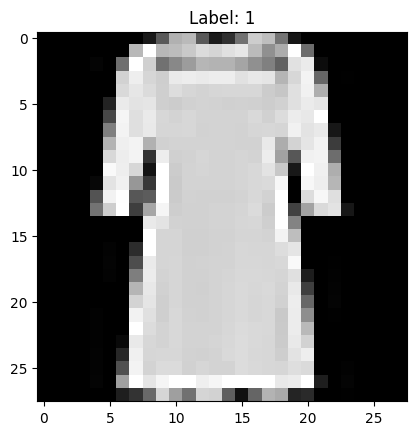

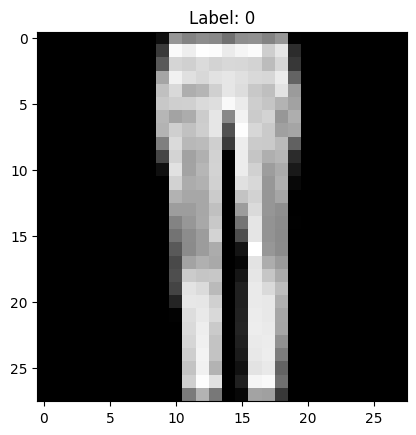

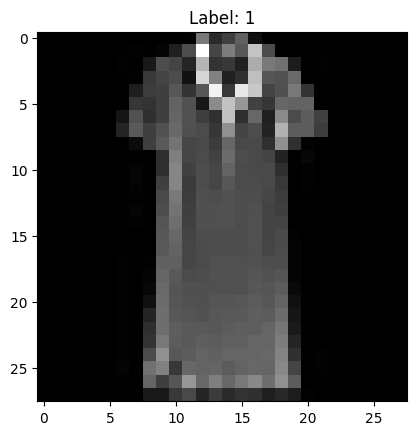

In [23]:
random_indices = train_data.sample(3).index
for index in random_indices:
    show_image(train_data.iloc[index, 1:], train_data.iloc[index, 0])

### Checking dataset by 2D plot

[source](https://www.kaggle.com/code/ohseokkim/base-denoising-autoencoder-dimension-reduction)

I really liked how cool it looked, so I took this code snippet to visualize our data. 
Uniform Manifold Approximation and Projection (UMAP) is a technique for visualizing high-dimensional data in lower-dimensional spaces. In our case we can see 2 distinct groups with several data points overlapping between other group.

<Axes: >

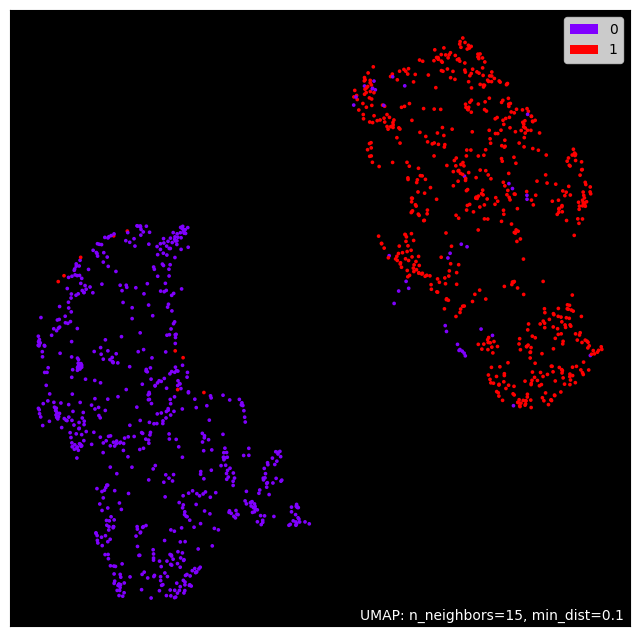

In [57]:
import umap.plot

mapper_org = umap.UMAP().fit(Xtrain)
umap.plot.points(mapper_org, labels=Ytrain, theme='fire')

## SVM without dimension reduction

In [42]:
from sklearn.model_selection import ParameterGrid
import numpy as np

start_C = 0.001
end_C = 1000
num_values = 40
C_values = np.logspace(np.log10(start_C), np.log10(end_C), num=num_values)

svc_param_grid = {
    'C': C_values,
    'kernel': ['rbf', 'linear', 'poly']
}
svc_params_comb = ParameterGrid(svc_param_grid)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

best_params_svc_orig = None
best_accuracy_svc_orig = 0

for params in svc_params_comb:
    svm_model = SVC(**params, random_state=random_seed)
    svm_model.fit(Xtrain, Ytrain)
    predictions = svm_model.predict(Xval)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_svc_orig:
        best_accuracy_svc_orig = accuracy
        best_params_svc_orig = params

In [49]:
best_params_svc_standard = None
best_accuracy_svc_standard = 0

for params in svc_params_comb:
    svm_model = SVC(**params, random_state=random_seed)
    svm_model.fit(Xtrain_standard, Ytrain)
    predictions = svm_model.predict(Xval_standard)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_svc_standard:
        best_accuracy_svc_standard = accuracy
        best_params_svc_standard = params

In [50]:
best_params_svc_minmax = None
best_accuracy_svc_minmax = 0

for params in svc_params_comb:
    svm_model = SVC(**params, random_state=random_seed)
    svm_model.fit(Xtrain_min_max, Ytrain)
    predictions = svm_model.predict(Xval_min_max)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_svc_minmax:
        best_accuracy_svc_minmax = accuracy
        best_params_svc_minmax = params

In [47]:
print(f"SVC Results:\n")

print("="*len("Original dataframe"))
print(f"Original dataframe:\n"
      f"Best accuracy on validation data: {best_accuracy_svc_orig:}\n"
      f"Best hyperparameters: {best_params_svc_orig}\n")

print("="*len("Standard scaled dataframe"))
print(f"Standard scaled dataframe\n"
      f"Best accuracy on validation data: {best_accuracy_svc_standard:}\n"
      f"Best hyperparameters: {best_params_svc_standard}\n")

print("="*len("Minmax scaled dataframe"))
print(f"Minmax scaled dataframe\n"
      f"Best accuracy on validation data: {best_accuracy_svc_minmax:}\n"
      f"Best hyperparameters: {best_params_svc_minmax}\n")

SVC Results:

Original dataframe:
Best accuracy on validation data: 0.98
Best hyperparameters: {'C': 7.01703828670383, 'kernel': 'rbf'}

Standard scaled dataframe
Best accuracy on validation data: 0.9733333333333334
Best hyperparameters: {'C': 119.37766417144383, 'kernel': 'poly'}

Minmax scaled dataframe
Best accuracy on validation data: 0.98
Best hyperparameters: {'C': 2.424462017082331, 'kernel': 'poly'}


## Naive Bayes without dimension reduction

In [54]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(Xtrain, Ytrain)
predictions = clf.predict(Xval)
accuracy = accuracy_score(Yval, predictions)

print(f"Naive bayes results:\n")
print(f"Best accuracy on validation data: {accuracy:}\n")

Naive bayes results:

Best accuracy on validation data: 0.8955555555555555


## LDA without dimension reduction

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_solvers = ['svd', 'lsqr']

In [63]:
best_params_lda_orig = None
best_accuracy_lda_orig = 0

for solver in lda_solvers:
    lda_model = LinearDiscriminantAnalysis(solver=solver)
    lda_model.fit(Xtrain, Ytrain)
    predictions = lda_model.predict(Xval)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_lda_orig:
        best_accuracy_lda_orig = accuracy
        best_params_lda_orig = solver   

In [64]:
best_params_lda_standard = None
best_accuracy_lda_standard = 0

for solver in lda_solvers:
    lda_model = LinearDiscriminantAnalysis(solver=solver)
    lda_model.fit(Xtrain_standard, Ytrain)
    predictions = lda_model.predict(Xval_standard)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_lda_standard:
        best_accuracy_lda_standard = accuracy
        best_params_lda_standard = solver   

In [65]:
best_params_lda_minmax = None
best_accuracy_lda_minmax = 0

for solver in lda_solvers:
    lda_model = LinearDiscriminantAnalysis(solver=solver)
    lda_model.fit(Xtrain_min_max, Ytrain)
    predictions = lda_model.predict(Xval_min_max)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_lda_minmax:
        best_accuracy_lda_minmax = accuracy
        best_params_lda_minmax = solver 

In [66]:
print(f"LDA Results:\n")

print("="*len("Original dataframe"))
print(f"Original dataframe:\n"
      f"Best accuracy on validation data: {best_accuracy_lda_orig:}\n"
      f"Best hyperparameters: {best_params_lda_orig}\n")

print("="*len("Standard scaled dataframe"))
print(f"Standard scaled dataframe\n"
      f"Best accuracy on validation data: {best_accuracy_lda_standard:}\n"
      f"Best hyperparameters: {best_params_lda_standard}\n")

print("="*len("Minmax scaled dataframe"))
print(f"Minmax scaled dataframe\n"
      f"Best accuracy on validation data: {best_accuracy_lda_minmax:}\n"
      f"Best hyperparameters: {best_params_lda_minmax}\n")

LDA Results:

Original dataframe:
Best accuracy on validation data: 0.9111111111111111
Best hyperparameters: svd

Standard scaled dataframe
Best accuracy on validation data: 0.9111111111111111
Best hyperparameters: svd

Minmax scaled dataframe
Best accuracy on validation data: 0.9111111111111111
Best hyperparameters: svd
